In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [34]:
dataset = pd.read_csv("Clients.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())
dataset

   age           job  marital  education default  balance housing personal  \
0   58    management  married   tertiary      no     2143     yes       no   
1   44    technician   single  secondary      no       29     yes       no   
2   33  entrepreneur  married  secondary      no        2     yes      yes   
3   35    management  married   tertiary      no      231     yes       no   
4   28    management   single   tertiary      no      447     yes      yes   

  term  
0   no  
1   no  
2   no  
3   no  
4   no  
(43193, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 9 columns):
age          43193 non-null int64
job          43193 non-null object
marital      43193 non-null object
education    43193 non-null object
default      43193 non-null object
balance      43193 non-null int64
housing      43193 non-null object
personal     43193 non-null object
term         43193 non-null object
dtypes: int64(2), object(7)
memory usage: 3.0

,age,job,marital,education,default,balance,housing,personal,term
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,35,management,married,tertiary,no,231,yes,no,no
4,28,management,single,tertiary,no,447,yes,yes,no
...,...,...,...,...,...,...,...,...,...
43188,51,technician,married,tertiary,no,825,no,no,yes
43189,71,retired,divorced,primary,no,1729,no,no,yes
43190,72,retired,married,secondary,no,5715,no,no,yes
43191,57,blue-collar,married,secondary,no,668,no,no,no


In [35]:
# Converting Categorical features into Numerical features

dataset['job'] = dataset['job'].map({'admin.':0, 'blue-collar':1, 'entrepreneur':2, 'housemaid':3,'management':4, 'retired':5,'self-employed':6,'services':7, 'student':8,'technician':9,'unemployed':10})
dataset['marital'] = dataset['marital'].map({'divorced':0, 'married':1, 'single':2})
dataset['education'] = dataset['education'].map({'primary':0, 'secondary':1, 'tertiary':2})
dataset['default'] = dataset['default'].map({'no':0, 'yes':1})
dataset['housing'] = dataset['housing'].map({'no':0, 'yes':1})
dataset['personal'] = dataset['personal'].map({'no':0, 'yes':1})
dataset['term'] = dataset['term'].map({'no':0, 'yes':1})
dataset

,age,job,marital,education,default,balance,housing,personal,term
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,35,4,1,2,0,231,1,0,0
4,28,4,2,2,0,447,1,1,0
...,...,...,...,...,...,...,...,...,...
43188,51,9,1,2,0,825,0,0,1
43189,71,5,0,0,0,1729,0,0,1
43190,72,5,1,1,0,5715,0,0,1
43191,57,1,1,1,0,668,0,0,0


In [36]:
dataset['age'].mean()

40.76408214293983

In [37]:
def converter_age(column):
    if column <= 25:
        return 0
    elif column >= 60:
        return 2
    else: 
        return 1
    
dataset['age']=dataset['age'].apply(converter_age)
dataset

,age,job,marital,education,default,balance,housing,personal,term
0,1,4,1,2,0,2143,1,0,0
1,1,9,2,1,0,29,1,0,0
2,1,2,1,1,0,2,1,1,0
3,1,4,1,2,0,231,1,0,0
4,1,4,2,2,0,447,1,1,0
...,...,...,...,...,...,...,...,...,...
43188,1,9,1,2,0,825,0,0,1
43189,2,5,0,0,0,1729,0,0,1
43190,2,5,1,1,0,5715,0,0,1
43191,1,1,1,1,0,668,0,0,0


In [38]:
dataset['balance'].mean()

1354.0273423934434

In [39]:
def converter(column):
  if column <=1354:
    return 0 # low
  else:
    return 1 #high

dataset['balance'] = dataset['balance'].apply(converter)
print(dataset.head())


   age  job  marital  education  default  balance  housing  personal  term
0    1    4        1          2        0        1        1         0     0
1    1    9        2          1        0        0        1         0     0
2    1    2        1          1        0        0        1         1     0
3    1    4        1          2        0        0        1         0     0
4    1    4        2          2        0        0        1         1     0


In [40]:
X = dataset
X

,age,job,marital,education,default,balance,housing,personal,term
0,1,4,1,2,0,1,1,0,0
1,1,9,2,1,0,0,1,0,0
2,1,2,1,1,0,0,1,1,0
3,1,4,1,2,0,0,1,0,0
4,1,4,2,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
43188,1,9,1,2,0,0,0,0,1
43189,2,5,0,0,0,1,0,0,1
43190,2,5,1,1,0,1,0,0,1
43191,1,1,1,1,0,0,0,0,0


In [41]:
# # Plotting Correlation Heatmap
corrs = X.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [42]:
# personal data

subset1= X[['age','marital','balance','housing']]

subset2= X[['age','job','education','balance']]

subset3= X[['age','job']]

In [43]:
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)

X2 = feature_scaler.fit_transform(subset2)

X3 = feature_scaler.fit_transform(subset3)

In [12]:
# # Analysis on Personal Data
# # Finding the number of clusters (K) - Elbow Plot Method
# inertia = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, random_state = 100)
#     kmeans.fit(X1)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('The Elbow Plot')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [13]:
# # Running KMeans to generate labels
# kmeans = KMeans(n_clusters = 3)
# kmeans.fit(X1)

In [14]:
# # Implementing t-SNE to visualize dataset
# tsne = TSNE(n_components = 2, perplexity =100,n_iter=3300)
# x_tsne = tsne.fit_transform(X1)

# age = list(X['age'])
# marital = list(X['marital'])
# balance = list(X['balance'])
# housing = list(X['housing'])
# data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
#                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
#                                 text=[f'age: {a}; marital: {b}; balance:{c}, housing:{d}' for a,b,c,d in list(zip(age,marital,balance,housing))],
#                                 hoverinfo='text')]

# layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
#                     xaxis = dict(title='First Dimension'),
#                     yaxis = dict(title='Second Dimension'))
# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig,filename='t-SNE.html')

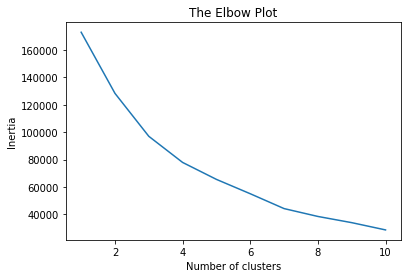

In [15]:
# # Analysis on Personal Data
# # Finding the number of clusters (K) - Elbow Plot Method
# inertia = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, random_state = 100)
#     kmeans.fit(X2)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('The Elbow Plot')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [22]:
# # Running KMeans to generate labels
# kmeans = KMeans(n_clusters = 2)
# kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# # Implementing t-SNE to visualize dataset
# tsne = TSNE(n_components = 2, perplexity =100,n_iter=3300)
# x_tsne = tsne.fit_transform(X2)

# age = list(X['age'])
# job = list(X['job'])
# education = list(X['education'])
# balance = list(X['balance'])
# data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
#                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
#                                 text=[f'age: {a}; job: {b}; education:{c}, balance:{d}' for a,b,c,d in list(zip(age,job,education,balance))],
#                                 hoverinfo='text')]

# layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
#                     xaxis = dict(title='First Dimension'),
#                     yaxis = dict(title='Second Dimension'))
# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig,filename='t-SNE(X2,100,3300).html')

In [28]:
# # Implementing t-SNE to visualize dataset
# tsne = TSNE(n_components = 2, perplexity =60,n_iter=3200)
# x_tsne = tsne.fit_transform(X1)

# age = list(X['age'])
# marital = list(X['marital'])
# balance = list(X['balance'])
# housing = list(X['housing'])
# data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
#                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
#                                 text=[f'age: {a}; marital: {b}; balance:{c}, housing:{d}' for a,b,c,d in list(zip(age,marital,balance,housing))],
#                                 hoverinfo='text')]

# layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
#                     xaxis = dict(title='First Dimension'),
#                     yaxis = dict(title='Second Dimension'))
# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig,filename='t-SNE(X1,60,3200).html')

't-SNE(X1,60,3200).html'

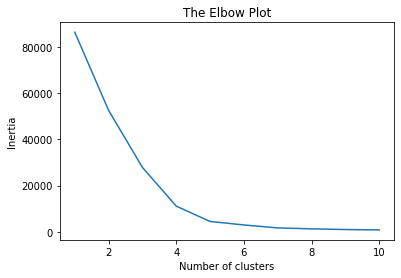

In [44]:
# Analysis on Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =60,n_iter=4000)
x_tsne = tsne.fit_transform(X2)

age = list(X['age'])
job = list(X['job'])
data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'age: {a}; job: {b}' for a,b in list(zip(age,job))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE(X3,40,4000).html')

't-SNE(X3,40,4000).html'